In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import graph_tool_extras as gte
import graph_tool.all as gt

In [3]:
PATH = 'games-sales.csv'
data = pd.read_csv(PATH)

In [4]:
data.head(3)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN


In [5]:
g = gte.load("degree.net.gz")
b, _ = gt.betweenness(g)
g.vp['betweenness'] = b

In [10]:
consoles = [v for v in g.vertices() if g.vp["Tipo"][v] == "Console"]

In [11]:
console_names = [g.vp["id"][v] for v in consoles] 
console_names_sem_pc = [g.vp["id"][v] for v in consoles if g.vp["id"][v] != "PC"] # eliminando outlier: PC

In [12]:
print(console_names)

['PS3', 'PS4', 'PS2', 'X360', 'XOne', 'PC', 'PSP', 'Wii', 'PS', 'DS', '2600', 'GBA', 'NES', 'XB', 'PSN', 'GEN', 'PSV', 'DC', 'N64', 'SAT', 'SNES', 'GBC', 'GC', 'NS', '3DS', 'GB', 'WiiU', 'WS', 'VC', 'NG', 'WW', 'SCD', 'PCE', 'XBL', '3DO', 'GG', 'OSX', 'Mob', 'PCFX', 'Series', 'All', 'iOS', '5200', 'And', 'DSiW', 'Lynx', 'Linux', 'MS', 'ZXS', 'ACPC', 'Amig', '7800', 'DSi', 'AJ', 'WinP', 'iQue', 'GIZ', 'VB', 'Ouya', 'NGage', 'AST', 'MSD', 'S32X', 'XS', 'PS5', 'Int', 'CV', 'Arc', 'C64', 'FDS', 'MSX', 'OR', 'C128', 'CDi', 'CD32', 'BRW', 'FMT', 'ApII', 'Aco', 'BBCM', 'TG16']


In [13]:
print(console_names_sem_pc)

['PS3', 'PS4', 'PS2', 'X360', 'XOne', 'PSP', 'Wii', 'PS', 'DS', '2600', 'GBA', 'NES', 'XB', 'PSN', 'GEN', 'PSV', 'DC', 'N64', 'SAT', 'SNES', 'GBC', 'GC', 'NS', '3DS', 'GB', 'WiiU', 'WS', 'VC', 'NG', 'WW', 'SCD', 'PCE', 'XBL', '3DO', 'GG', 'OSX', 'Mob', 'PCFX', 'Series', 'All', 'iOS', '5200', 'And', 'DSiW', 'Lynx', 'Linux', 'MS', 'ZXS', 'ACPC', 'Amig', '7800', 'DSi', 'AJ', 'WinP', 'iQue', 'GIZ', 'VB', 'Ouya', 'NGage', 'AST', 'MSD', 'S32X', 'XS', 'PS5', 'Int', 'CV', 'Arc', 'C64', 'FDS', 'MSX', 'OR', 'C128', 'CDi', 'CD32', 'BRW', 'FMT', 'ApII', 'Aco', 'BBCM', 'TG16']


In [14]:
index_pc = console_names.index("PC")
print(index_pc)

5


In [15]:
degrees = g.get_total_degrees()
print(degrees)

0           8
1        1905
2        2878
3           3
4        3565
         ... 
39872       1
39873       1
39874       2
39875       1
39876       1
Length: 39877, dtype: uint64


In [16]:
console_degrees = [degrees[int(v)] for v in consoles]
console_degrees_sem_pc = [degrees[int(v)] for i, v in enumerate(consoles) if i != index_pc]

In [17]:
print(console_degrees)

[np.uint64(1905), np.uint64(2878), np.uint64(3565), np.uint64(1735), np.uint64(1963), np.uint64(12617), np.uint64(1807), np.uint64(1676), np.uint64(2707), np.uint64(3288), np.uint64(501), np.uint64(1659), np.uint64(1106), np.uint64(982), np.uint64(2004), np.uint64(804), np.uint64(1105), np.uint64(655), np.uint64(393), np.uint64(739), np.uint64(1211), np.uint64(16), np.uint64(663), np.uint64(2337), np.uint64(1192), np.uint64(1599), np.uint64(554), np.uint64(199), np.uint64(661), np.uint64(174), np.uint64(465), np.uint64(218), np.uint64(459), np.uint64(2120), np.uint64(305), np.uint64(332), np.uint64(673), np.uint64(20), np.uint64(67), np.uint64(464), np.uint64(1138), np.uint64(155), np.uint64(73), np.uint64(1051), np.uint64(753), np.uint64(89), np.uint64(370), np.uint64(336), np.uint64(19), np.uint64(20), np.uint64(30), np.uint64(59), np.uint64(76), np.uint64(72), np.uint64(70), np.uint64(17), np.uint64(55), np.uint64(22), np.uint64(25), np.uint64(61), np.uint64(17), np.uint64(27), np.u

In [18]:
print(console_degrees_sem_pc)

[np.uint64(1905), np.uint64(2878), np.uint64(3565), np.uint64(1735), np.uint64(1963), np.uint64(1807), np.uint64(1676), np.uint64(2707), np.uint64(3288), np.uint64(501), np.uint64(1659), np.uint64(1106), np.uint64(982), np.uint64(2004), np.uint64(804), np.uint64(1105), np.uint64(655), np.uint64(393), np.uint64(739), np.uint64(1211), np.uint64(16), np.uint64(663), np.uint64(2337), np.uint64(1192), np.uint64(1599), np.uint64(554), np.uint64(199), np.uint64(661), np.uint64(174), np.uint64(465), np.uint64(218), np.uint64(459), np.uint64(2120), np.uint64(305), np.uint64(332), np.uint64(673), np.uint64(20), np.uint64(67), np.uint64(464), np.uint64(1138), np.uint64(155), np.uint64(73), np.uint64(1051), np.uint64(753), np.uint64(89), np.uint64(370), np.uint64(336), np.uint64(19), np.uint64(20), np.uint64(30), np.uint64(59), np.uint64(76), np.uint64(72), np.uint64(70), np.uint64(17), np.uint64(55), np.uint64(22), np.uint64(25), np.uint64(61), np.uint64(17), np.uint64(27), np.uint64(3), np.uint6

In [27]:
index_pc = console_names.index("PC")
consoles_sem_pc = [v for i, v in enumerate(consoles) if i != index_pc]
console_names_sem_pc = [g.vp["id"][v] for v in consoles_sem_pc]

console_degrees = [g.get_total_degrees([v])[0] for v in consoles_sem_pc]
console_betweenness = [g.vp['betweenness'][v] for v in consoles_sem_pc]

console_degrees = [g.get_total_degrees([v])[0] for v in consoles_sem_pc]
console_betweenness = [g.vp['betweenness'][v] for v in consoles_sem_pc]

In [28]:
df_degree = pd.DataFrame({
    "console": console_names_sem_pc,
    "degree": console_degrees_sem_pc
})

df_vendas = pd.read_csv("games-sales.csv")

df_sales = df_vendas.groupby("console", as_index=False)["total_sales"].sum()

df_merge = pd.merge(df_degree, df_sales, on="console")

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     96.27
Date:                Mon, 19 May 2025   Prob (F-statistic):           2.90e-15
Time:                        14:58:28   Log-Likelihood:                -506.26
No. Observations:                  80   AIC:                             1017.
Df Residuals:                      78   BIC:                             1021.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.1736     19.289     -1.772      0.0

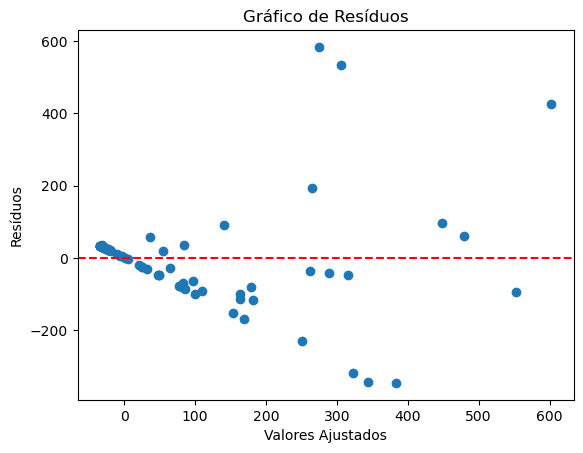

In [29]:
# Regressão linear

X = sm.add_constant(df_merge["degree"])
y = df_merge["total_sales"]
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

# Gráfico de resíduos
plt.scatter(modelo.fittedvalues, modelo.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Gráfico de Resíduos")
plt.show()